In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [156]:
clf = SGDRegressor()
clf.fit(X, Y)
Y_pred = clf.predict(X)
mse_sci=mean_squared_error(Y, clf.predict(X))
print(mean_squared_error(Y, clf.predict(X)))

22.85633089547105


In [59]:
def updateWeight(x_i,y_i,w,r,b):
    w=np.transpose(w)
    derivativeWeight = (-2 * x_i)*(y_i-(np.matmul(w,x_i))-b)
    derivativeB = (-2)*(y_i-(np.matmul(w,x_i))-b)
    w_new = w-r*derivativeWeight
    b_new = b-r*derivativeB
    return w_new,b_new

In [135]:
#intialize weight vector uniformly between 0 and 1 with size as len(X[0])
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random_integers.html
weight=(np.random.random_integers(len(X[0]),size=len(X[0])) - 1) / (len(X[0]) - 1.)
b=(np.random.random_integers(N) - 1) / (N - 1.)

In [127]:
#Implementing Gradient Descent
r=1
for x_i,y_i in zip(X,Y):
    w_new,b_new=updateWeight(x_i,y_i,weight,r,b)
    temp=False
    for i in range(len(w_new)):
        if(isclose(w_new[i], weight[i], abs_tol=10**-4)):
            temp=True
        else:
            temp=False
            break
    if(temp == True and isclose(b, b_new, abs_tol=10**-4)):
        w=np.transpose(weight)
        mse=((y_i-(np.matmul(w,x_i))-b_new)**2)/len(X)
        print(mse)
        break
    else:
        weight = w_new
        b= b_new
        r=r/2    

10.743416087649539


In [128]:
print(w_new,b_new)

[ -36.07031278   -9.59642553   52.67684094  -24.06340093  -22.17282387
  547.67489582  104.06875489  -80.14750588 -112.49079479  -53.59870641
 -159.67347666   39.52783839  -62.3907721 ] 92.19252633202514


In [129]:
y_predict_own=list()
w=np.transpose(w_new)
for x_i in X:
    y_predict_own.append((np.matmul(w,x_i))-b_new)

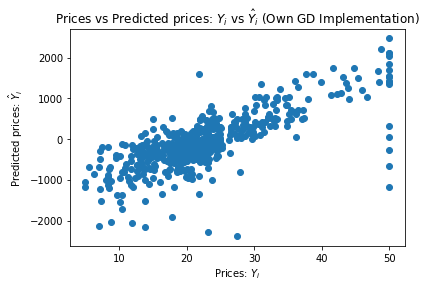

In [132]:
plt.scatter(Y, y_predict_own)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (Own GD Implementation)")
plt.show()

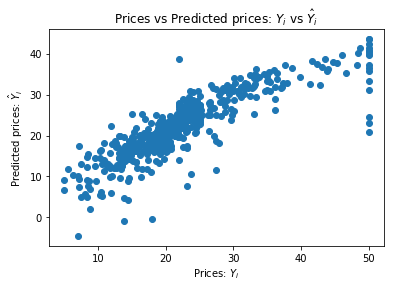

In [79]:
plt.scatter(Y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [97]:
#creating batch of size = 50
def batch(X,Y):
    for i in np.arange(0, len(X), 50):
        yield(X[i:i + 50],Y[i:i + 50])

In [147]:
#intialize weight vector uniformly between 0 and 1 with size as len(X[0])
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random_integers.html
weight=(np.random.random_integers(len(X[0]),size=len(X[0])) - 1) / (len(X[0]) - 1.)
b=(np.random.random_integers(N) - 1) / (N - 1.)

In [148]:
#implementing SGD for 3 epochs
r=1
for _ in range(3):
    for (x,y) in batch(X,Y):
        for x_i,y_i in zip(X,Y):
            w_new,b_new=updateWeight(x_i,y_i,weight,r,b)
            temp=False
            for i in range(len(w_new)):
                if(isclose(w_new[i], weight[i], abs_tol=10**-4)):
                    temp=True
                else:
                    temp=False
                    break
            if(temp == True and isclose(b, b_new, abs_tol=10**-4)):
                w=np.transpose(weight)
                mse=((y_i-(np.matmul(w,x_i))-b_new)**2)/len(X)
                print(mse)
                break
            else:
                weight = w_new
                b= b_new
                r=r/2
        else:
            continue
        break
    else:
        continue
    break

9.741587976057133


In [149]:
print(w_new,b_new)

[ -34.62875814   -9.28411016   50.19010818  -24.00403826  -20.6049538
  523.91082277   99.81465117  -76.40507902 -108.0972017   -51.18804149
 -152.75055164   38.04434467  -59.97321004] 88.47302923471254


In [150]:
y_predict_own=list()
w=np.transpose(w_new)
for x_i in X:
    y_predict_own.append((np.matmul(w,x_i))-b_new)

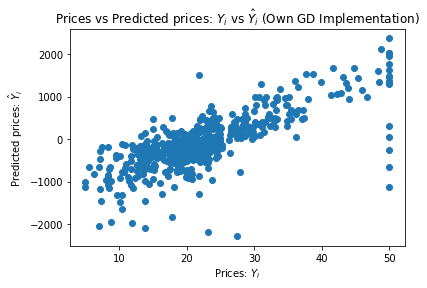

In [151]:
plt.scatter(Y, y_predict_own)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (Own GD Implementation)")
plt.show()

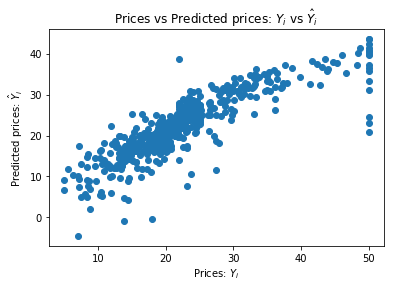

In [152]:
plt.scatter(Y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [153]:
w_sci=clf.coef_

In [157]:
from prettytable import PrettyTable
    
pt = PrettyTable()

pt.field_names = ["Weights after Own Implementation", "Weights after Scikit Implementation"]

for i in range(len(w_sci)):
    pt.add_row([w_new[i],w_sci[i]])
print(pt)

+----------------------------------+-------------------------------------+
| Weights after Own Implementation | Weights after Scikit Implementation |
+----------------------------------+-------------------------------------+
|        -34.62875814060497        |         -0.6606543756662175         |
|        -9.28411016339717         |          0.656840772719418          |
|         50.1901081813544         |         -0.42339191578793306        |
|       -24.004038257439113        |          0.7273996660495303         |
|        -20.6049537963019         |         -0.9129832131805464         |
|        523.9108227685517         |          3.1685045193403436         |
|        99.81465117372423         |         -0.12033913135373454        |
|        -76.40507901837287        |         -2.0652427004389455         |
|       -108.09720169945932        |          0.738257921592613          |
|        -51.18804148822836        |         -0.4811088082362056         |
|       -152.750551635950

In [158]:
pt = PrettyTable()

pt.field_names = ["MSE after Own Implementation", "MSE after Scikit Implementation"]
pt.add_row([mse,mse_sci])
print(pt)

+------------------------------+---------------------------------+
| MSE after Own Implementation | MSE after Scikit Implementation |
+------------------------------+---------------------------------+
|      9.741587976057133       |        22.85633089547105        |
+------------------------------+---------------------------------+


# Conclusion

1) Mean Squared error is 9.741587976057133 after *Own SGD implementation* while Mean Squared error is 22.85633089547105 after *Scikit-Learn SGD implementation*

2) The plot obtained after *Own SGD implementation* is almost similar to that obtained after *Scikit-Learn SGD implementation* .

3) Even the plot from *Own Gradient Descent* is similar to Scikit-Learn SGD implementation*

4) There is a lot of difference in weights, obtained after *Own SGD implementation* to that obtained after *Scikit-Learn SGD implementation* .